**Análisis de Correspondencia Múltiple**

Estadística Aplicada III

Profesor: Simón Luna Gómez Coria

Alumnos:
Ian Carbajal,
Rodrigo Uribe,
Samuel Méndez

# Idea Intuitiva

El término “análisis de correspondencias múltiples” surgió para designar una técnica de estadística multivariada que apareció en las décadas de 1960 y 1970, pero que puede considerarse como una extensión de una técnica más antigua y mejor conocida, a saber, el análisis de componentes principales (PCA). A diferencia del PCA el análisis de correspondencias multiples no trabaja con datos numéricos, sino con datos categóricos, o variables cualitativas.

El análisis de correspondencias múltiple es un enfoque que busca analizar asociaciones en datos categóricos proyectando las categorías de las variables en nuevas dimensiones numéricas. Se aplica a tablas generalmente grandes que presentan un conjunto de características "cualitativas" para una población de individuos. Extrae de estas tablas la información estructuralmente más importante.

Proporciona una síntesis mostrada en forma de gráfico en el que se muestra la población estudiada y las características detalladas en espacios de baja dimensión. Individuos estadísticamente similares son representados en la gráfica como puntos que tienden a agruparse similarmente, mientras que los asimilares son distantes.

Los ejes en el espacio reducido representan dimensiones latentes que explican la variabilidad en los datos. Interpretar estos ejes ayuda a comprender las relaciones entre las variables y a identificar qué combinaciones de categorías contribuyen más a la variabilidad observada.

Finalmente, el análisis de correspondencias múltiple nos da la representación gráfica de las asociaciones entre categorías de variables categóricas en un espacio reducido, facilitando la identificación de patrones, la interpretación de ejes y la validación de las relaciones observadas.



# Teoría

El análisis de Correspondencias Múltiples es un área del análisis multivariado en la que se tiene como objetivo entender y analizar datos **cualitativos** de varias dimensiones. La idea es muy similar a PCA pero con variables no numéricas.

El análisis de correspondencias es una técnica gráfica utilizada para representar la información contenida en una tabla de contingencia bidireccional. Esta tabla contiene las frecuencias o recuentos de elementos para la clasificación cruzada de dos variables categóricas. Con el análisis de correspondencias, construimos un gráfico que muestra la interacción de estas dos variables categóricas, así como la relación de las filas entre sí y de las columnas entre sí.

Para poder realizar un análizar un análisis de correspondencia necesitamos tener primero una tabla de contingencia.

¿Qué es una tabla de contingencia?

Una tabla de contingencia es una herramienta estadística que organiza datos en forma de filas y columnas para mostrar la distribución conjunta de dos o más variables categóricas. Cada celda de la tabla contiene el recuento o frecuencia de observaciones que cumplen con una combinación específica de categorías de las variables en estudio.






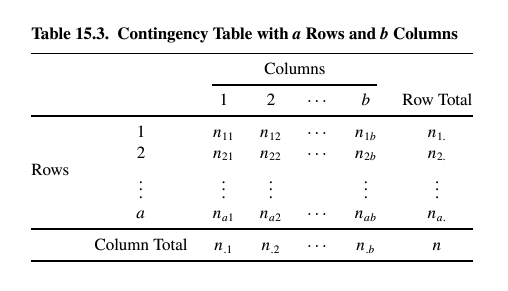

La frecuencias $n_{ij}$ se pueden convertir en frecuencias relativas de la forma: $p_{ij}=n_{ij}/n$

La tabla anterior puede verse como
$\begin{bmatrix}
   P & r \\
   c^T & 1 \\
\end{bmatrix} $

Una vez que tenemos esta tabla definimos la columna P como perfiles.



>$r^T_i = (p_{i1}/p_i, p_{i2}/p_i,...,p_{ib}/p_i )$



definimos la matriz diagonal $D_r$ como:

$D_r=diag(r)$

$=\begin{bmatrix}
   p_1 & 0& 0 \\
   0 & p_2&0 \\
   0& 0&p_n\\
\end{bmatrix} $  

De manera en que la matriz R de perfiles puede verse como

 $R=D_r^{-1}P$

> Bloque con sangría



De la misma forma podemos ver que:

> $c_i = (p_{1j}/p_i, p_{2j}/p_i,...,p_{aj}/p_i )$




Y definiendo una matriz similar de la forma

$D_c = diag(c)$

Podemos ver que

$C = PD^{-1}$

Para obtener coordenadas que puedan representar los datos con la menor varianza posible.

Primero hacemos un escalamiento a $P-rc^T$
De la forma:

> $Z = D_r^{-1/2}(P-rc^T)D_c^{-1/2}=U\Lambda V^T$




Haciendo varios despejes tenemos que

$P-rc^T = A\Lambda B^T$

De esta forma, para obtener las coordenadas de cada uno de los elementos tenemos que

$X=D^{-1}_rA\Lambda$

$Y=D_c^{-1}B\Lambda$


En donde se respeta la distancia:

$d_{ij}^2 = (r_1-r_j)^TD^{-1}_c(r_i-r_j)$








# Ejemplo

**Ejemplo** en Python


In [1]:
#Insalar mca si es necesario
!pip install mca

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6038 sha256=7f3bccc4b988a58c3ed2222598b1449edc22c10c8130858c2effe4112dfeb7ec
  Stored in directory: c:\users\lebue\appdata\local\pip\cache\wheels\98\34\01\a42e47f7ccc0a4f4283780349f8d347391bd0d8e0d83198b5d
Successfully built mca


### Paqueterías utilizadas

In [3]:
import pandas as pd
import mca
import matplotlib.pyplot as plt
import seaborn as sns

### Carga y Preparación de Datos
El código comienza cargando el conjunto de datos del Titanic usando la biblioteca `seaborn`. Después, selecciona solo las variables categóricas relevantes para el análisis y elimina cualquier fila con datos faltantes.

In [4]:
#Cargar el conjunto de datos del Titanic
titanic = sns.load_dataset('titanic')

# Seleccionar solo las variables categóricas y eliminar las filas con valores perdidos
categorical_vars = ['class', 'sex', 'embarked', 'deck']
titanic_categorical = titanic[categorical_vars].dropna()


Las columnas `class`, `sex`, `embarked`, y `deck` fueron seleccionadas para el Análisis de Correspondencia Múltiple (ACM) por las siguientes razones:

1. **Relevancia**: Estas variables suelen tener una importancia significativa en el análisis de los datos del Titanic. Por ejemplo, se ha demostrado que la clase de pasaje (`class`), el sexo (`sex`) y la ubicación del camarote (`deck`) tienen una correlación con la supervivencia de los pasajeros.

2. **Naturaleza Categórica**: El ACM es específicamente una técnica para analizar y visualizar relaciones en datos categóricos. Las variables seleccionadas son categóricas y no numéricas, lo que las hace adecuadas para este tipo de análisis.

   - `class`: Representa la clase de boleto (Primera, Segunda, Tercera), lo cual es una categoría socioeconómica.
   - `sex`: Indica el género del pasajero, que es binario en este conjunto de datos (masculino o femenino).
   - `embarked`: Se refiere al puerto de embarque del pasajero (C = Cherbourg; Q = Queenstown; S = Southampton), lo que puede reflejar la geografía y la economía.
   - `deck`: Representa la cubierta en la que se ubicaba el camarote del pasajero, lo que podría estar relacionado con la clase de boleto y las tasas de supervivencia.

3. **Complejidad Manejable**: Las variables seleccionadas proporcionan una complejidad suficiente para permitir un análisis interesante sin terminar siendo un proceso muy complejo. Esto fue muy importante para la visualización en dos dimensiones, ya que demasiadas variables podrían hacer que los resultados sean difíciles de interpretar.

4. **Datos Disponibles**: Estas columnas tienen una cantidad relativamente buena de datos sin valores faltantes en comparación con otras variables en el conjunto de datos del Titanic. Aunque la columna `deck` tiene muchos valores perdidos, en este caso, los datos faltantes se han eliminado previamente para simplificar el análisis.

5. **Interpretabilidad**: Las variables elegidas tienen categorías que son intuitivamente comprensibles y tienen sentido en el contexto histórico y social del Titanic. Esto facilita la interpretación de los resultados del ACM.

In [6]:
# Crear dummies para las variables categóricas
titanic_dummies = pd.get_dummies(titanic_categorical)

# Inicializar la instancia de MCA
mca_model = mca.MCA(titanic_dummies)

# Calcular las coordenadas
coords = mca_model.fs_r(N=2)  # N es el número de dimensiones

### Transformación de Variables Categóricas
El código convierte las variables categóricas en variables dummy. Esto se hace para que puedan ser utilizadas en el cálculo matemático del ACM, que requiere datos numéricos.

### Ejecución del ACM
El objeto `MCA` de la biblioteca `mca` es inicializado y aplicado a los datos. Se calculan las coordenadas de las filas para dos dimensiones principales.

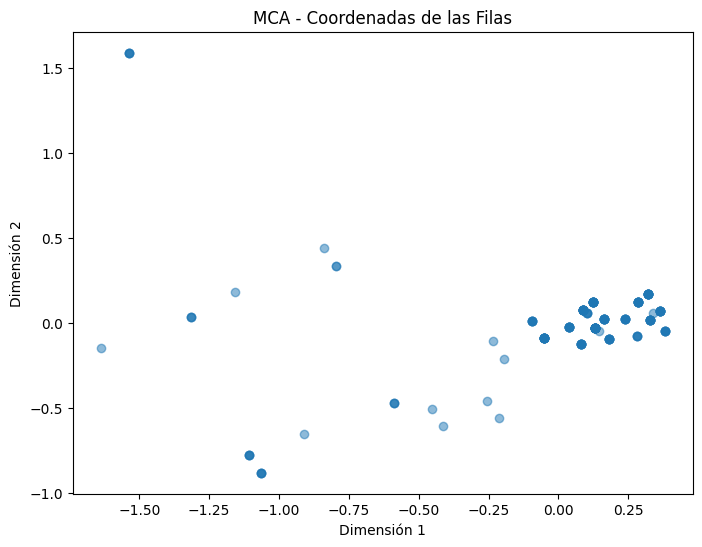

In [5]:
# Graficar las coordenadas de las filas (individuos)
plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('MCA - Coordenadas de las Filas')
plt.show()

Al final, obtenemos un gráfico bidimensional de las coordenadas de las filas obtenidas de un Análisis de Correspondencia Múltiple (ACM) aplicado al conjunto de datos del Titanic.

El gráfico de dispersión muestra cómo se relacionan los individuos basándose en sus respuestas categóricas. Los puntos que están cerca entre sí en el gráfico tienen perfiles similares, mientras que los que están más alejados son más disímiles. Esto puede ayudar a identificar patrones o agrupamientos en los datos basados en las categorías analizadas.

El gráfico muestra la distribución de los individuos en el espacio de las dos primeras dimensiones del ACM. La interpretación de estos ejes depende de la contribución de las categorías originales a cada eje, que se puede examinar mirando las coordenadas de las columnas (categorías) y evaluando qué categorías tienen valores altos en las mismas dimensiones.

En resumen, el ACM nos permitió visualizar y explorar las relaciones entre múltiples variables categóricas y los individuos en un conjunto de datos, lo cual es particularmente útil para datos con muchas variables categóricas, como encuestas y datos demográficos.